# EDA of Hotel Bookings  
This notebook provides an exploratory data analysis of hotel bookings. This data set contains booking information for a city hotel and a resort hotel over a span of 3 years. For more information, please see the dataset at `link`

This notebook will answer a few key business questions followed by an EDA to identify the variables that may be impacting the booking cancellations for these hotels.

Let's begin by importing all the libraries needed for our analysis

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

We can now get our file

In [6]:
file_path = "data/hotel_bookings.csv"
df = pd.read_csv(file_path)


In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Displaying basic information

`data.info()` : 
Displays general information about the DataFrame, such as data types and non-null counts.

`data.describe().T` :
Provides descriptive statistics for numerical columns.

`data.isnull().sum()` :
Displays the count of missing values in each column of the DataFrame.

`data.shape` :
Displays the number of rows and the number of columns in the form of a tuple.

`data.columns` :
Displays the names of the columns in the DataFrame as a list.

_______________________________________________________________________________________________________________

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [10]:
all_missing_values = df.isnull().sum()
all_missing_percent = (all_missing_values)/(df.shape[0])*100
all_missing_df =  pd.DataFrame({'All Null Values': all_missing_values, '% of all Missing values': all_missing_percent})
all_missing_df


,All Null Values,% of all Missing values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [11]:
df.shape

(119390, 32)

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

______________________________________________________________________________________________________________

### Handling Missing Values

The goal is to first display all the missing values and handle them accordingly

In [13]:
missing_values = all_missing_values[all_missing_values>0]
missing_percent = all_missing_percent[all_missing_percent>0]

missing_df = pd.DataFrame({'Null Values': missing_values, '% of Missing values': missing_percent})
missing_df


,Null Values,% of Missing values
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


There are 4 columns having null values.

1) `children`: This column has only 4 missing values. These can be replaced with the mode of all the values as it is a suitable choice for categorical variables. 
2) `country` : Missing countries can be replaced with "Unknown"
3) `agent` : Missing agent IDs can be replaced with a 0 since it will not correspond to any existing IDs in the current dataset or to new additions in any future modifications of the dataset.
4) `company`: Since 94% of company values are missing, we might consider dropping the column entirely if it does not prove useful for our analaysis. For now, we will replace the missing values with a 0.

In [14]:
missing_replacements = {"children": df['children'].mode(), "country": "Unknown", "agent": 0, "company": 0}
df = df.fillna(missing_replacements)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

There could also be some entries that have no guests, let's find these rows

In [16]:
no_guests = df.loc[(df['adults'] == 0)& (df['children'] == 0)& (df['babies'] == 0)]
no_guests.shape

(180, 32)

There are 180 rows with no adults, children or babies, i.e no guests. Therefore, we can drop these rows.

In [17]:
dropped_rows = df[ (df['adults'] == 0)& (df['children'] == 0)& (df['babies'] == 0) ].index
df.drop(dropped_rows, inplace = True)
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [18]:
no_guests = df.loc[(df['adults'] == 0)& (df['children'] == 0)& (df['babies'] == 0)]
no_guests.shape




(0, 32)

There are no more rows with 0 guests

___________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Exploratory Data Analysis

Let's address a few business questions in our exploratory data analysis.

1) Where do most bookings come from?
2) What are the most effective marketing channels?
3) What is the busiest time of the year?
4) How much do guests pay?
5) What is the price variance over the year?
6) What is the average length of stay?

### 1. Where do most bookings come from?

We will only consider bookings that were not cancelled

In [19]:
countries = pd.DataFrame(df.loc[df['is_canceled'] == 0, 'country'].value_counts()).reset_index()
countries.rename(columns={"count":"No. of guests"}, inplace = True)
total_guests = countries['No. of guests'].sum()
countries["% of Guests"] = round(countries['No. of guests']/total_guests * 100, 2)
countries [:10]

,country,No. of guests,% of Guests
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
5,IRL,2542,3.39
6,ITA,2428,3.24
7,BEL,1868,2.49
8,NLD,1716,2.29
9,USA,1592,2.12


A majority of the hotel guests (28%) come from Portugal. In addition to this, most of the guests with the highest number of bookings are based in Europe

In [20]:
fig = px.pie(countries,
             values="No. of guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [21]:
colorscale = ["rgb(249,231,249)", "rgb(10,9,49)", "rgb(5,2,34)"]
guest_map = px.choropleth(countries,
                    locations=countries['country'],
                    color=countries["No. of guests"], 
                    hover_name=countries['country'], 
                    color_continuous_scale=colorscale,
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    title="Where do the guests come from?")
guest_map.show()

### 2. What are the most effective marketing channels?

In [22]:
market_channel_counts = pd.DataFrame(df.groupby(by=(['market_segment','hotel']))['market_segment'].value_counts()).reset_index()
market_channel_counts = market_channel_counts.sort_values(by = 'count', ascending= False)
market_channel_counts


,market_segment,hotel,count
11,Online TA,City Hotel,38679
12,Online TA,Resort Hotel,17729
9,Offline TA/TO,City Hotel,16712
7,Groups,City Hotel,13959
10,Offline TA/TO,Resort Hotel,7470
6,Direct,Resort Hotel,6510
5,Direct,City Hotel,6072
8,Groups,Resort Hotel,5832
3,Corporate,City Hotel,2977
4,Corporate,Resort Hotel,2305


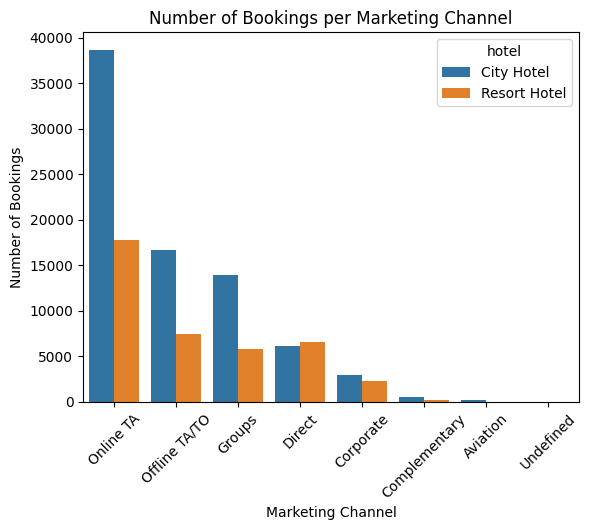

In [23]:
sns.barplot(data=market_channel_counts,x=market_channel_counts['market_segment'], y=market_channel_counts['count'],hue=market_channel_counts['hotel'])

plt.title('Number of Bookings per Marketing Channel')

plt.xlabel('Marketing Channel')

plt.ylabel('Number of Bookings')

plt.xticks(rotation = 45)
plt.show()

It is clear that for both City and Resort hotels, Online Travel Agents bring in majority of the customers.  
A direct appproach seems to be slightly more effective for resort bookings than city bookings.

### 3. What is the busiest time of the year?

In [24]:

confirmed_bookings = df[df['is_canceled'] == 0]
bookings = confirmed_bookings.groupby(by=['hotel','arrival_date_month'])['arrival_date_month'].value_counts().reset_index(name = 'count')

pivot_bookings = bookings.pivot(index = 'arrival_date_month', columns='hotel', values='count')
pivot_bookings = pivot_bookings.sort_values(by = ['City Hotel','Resort Hotel'], ascending = [False,False])
pivot_bookings



hotel,City Hotel,Resort Hotel
arrival_date_month,,
August,5367,3257
July,4770,3137
May,4568,2535
June,4358,2037
October,4326,2575
September,4283,2102
March,4049,2571
April,4010,2550
February,3051,2308


Both city hotels and resort hotels get the most bookings in August making it the busiest time of the year.

In [25]:
month_order = ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']
bookings['arrival_date_month'] = pd.Categorical(bookings['arrival_date_month'], categories=month_order, ordered=True)
bookings.head(5)


,hotel,arrival_date_month,count
0,City Hotel,April,4010
1,City Hotel,August,5367
2,City Hotel,December,2377
3,City Hotel,February,3051
4,City Hotel,January,2249


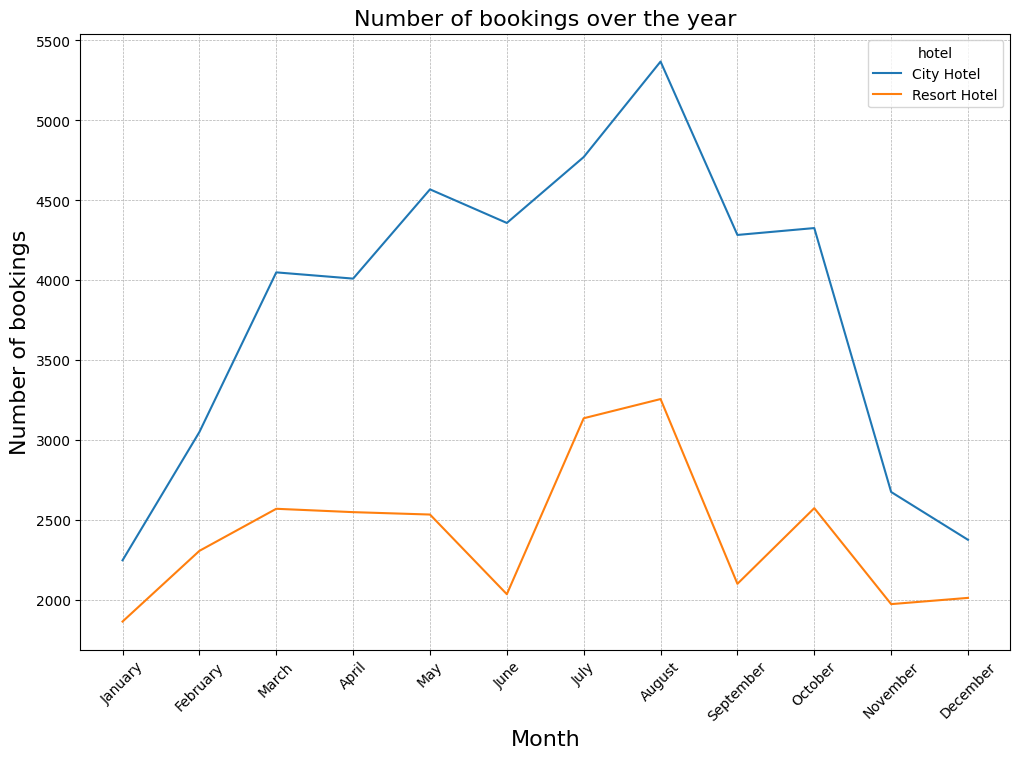

In [26]:

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="count", hue="hotel", data=bookings, 
             errorbar="sd")
plt.title("Number of bookings over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of bookings", fontsize=16)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()

4. ### What is the average length of stay?

In [27]:
confirmed_df =df[df['is_canceled'] == 0]
confirmed_df['Total Stays'] = confirmed_df['stays_in_week_nights'] + confirmed_df['stays_in_weekend_nights']
grouped_stays = confirmed_df.groupby(by=['hotel','Total Stays'])['Total Stays'].value_counts().reset_index()
total_stays_per_hotel = grouped_stays.groupby('hotel')['count'].transform('sum')
grouped_stays['Percentage Stays']= (grouped_stays['count'] / total_stays_per_hotel) * 100
grouped_stays



C:\Users\nidhi\AppData\Local\Temp\ipykernel_1764\2753294823.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,Total Stays,count,Percentage Stays
0,City Hotel,0,251,0.544658
1,City Hotel,1,9155,19.865897
2,City Hotel,2,10983,23.832567
3,City Hotel,3,11889,25.798542
4,City Hotel,4,7694,16.695599
...,...,...,...,...
57,Resort Hotel,45,1,0.003457
58,Resort Hotel,46,1,0.003457
59,Resort Hotel,56,1,0.003457
60,Resort Hotel,60,1,0.003457


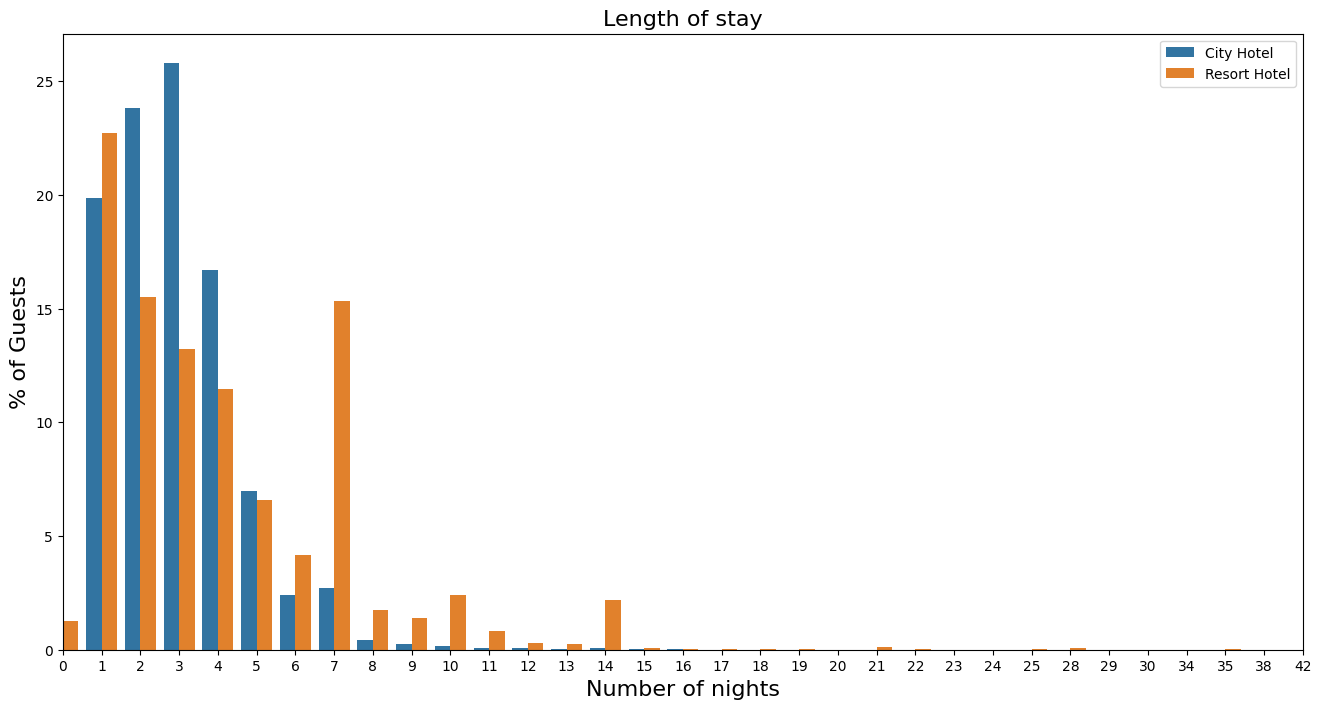

In [28]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "Total Stays", y = "Percentage Stays", hue="hotel", data=grouped_stays,
            hue_order = ["City Hotel", "Resort Hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("% of Guests", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,32)
plt.show()

For City Hotels:  
- Roughly a quarter of the guests stay for 3 nights, followed by 2 nights and 1 night.
- Guests tend to stay for a shorter duration in City hotels as compared to resort hotels.  

For Resort Hotels:
- Most guests either prefer to stay for just 1-2 nights or they stay for the entire week or two.
- A larger percentage of resort guests prefer to stay more than a week compared to city guests. 

### 4. How much do guests pay?

In [29]:
confirmed_df['total_people'] = confirmed_df['adults'] + confirmed_df['children']
confirmed_df['adr_pp'] = confirmed_df['adr'] / confirmed_df['total_people']
avg_adr_pp = confirmed_df.groupby(by=['hotel'])['adr_pp'].mean().reset_index()

avg_adr_pp

C:\Users\nidhi\AppData\Local\Temp\ipykernel_1764\1754392880.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nidhi\AppData\Local\Temp\ipykernel_1764\1754392880.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,adr_pp
0,City Hotel,59.272988
1,Resort Hotel,47.488866


On average, City hotel guests pay 59.27 and Resort hotel guests pay 47.48 per person respectively.

### 5. What is the price variance over the year?


In [30]:
avg_price = confirmed_df.groupby(by=['hotel','arrival_date_month'])['adr'].mean().reset_index()
avg_price['arrival_date_month'] = pd.Categorical(avg_price['arrival_date_month'], categories=month_order, ordered=True)
avg_price

,hotel,arrival_date_month,adr
0,City Hotel,April,111.962267
1,City Hotel,August,118.674598
2,City Hotel,December,88.401855
3,City Hotel,February,86.520062
4,City Hotel,January,82.330983
5,City Hotel,July,115.818019
6,City Hotel,June,117.874360
7,City Hotel,March,90.658533
8,City Hotel,May,120.669827
9,City Hotel,November,86.946592


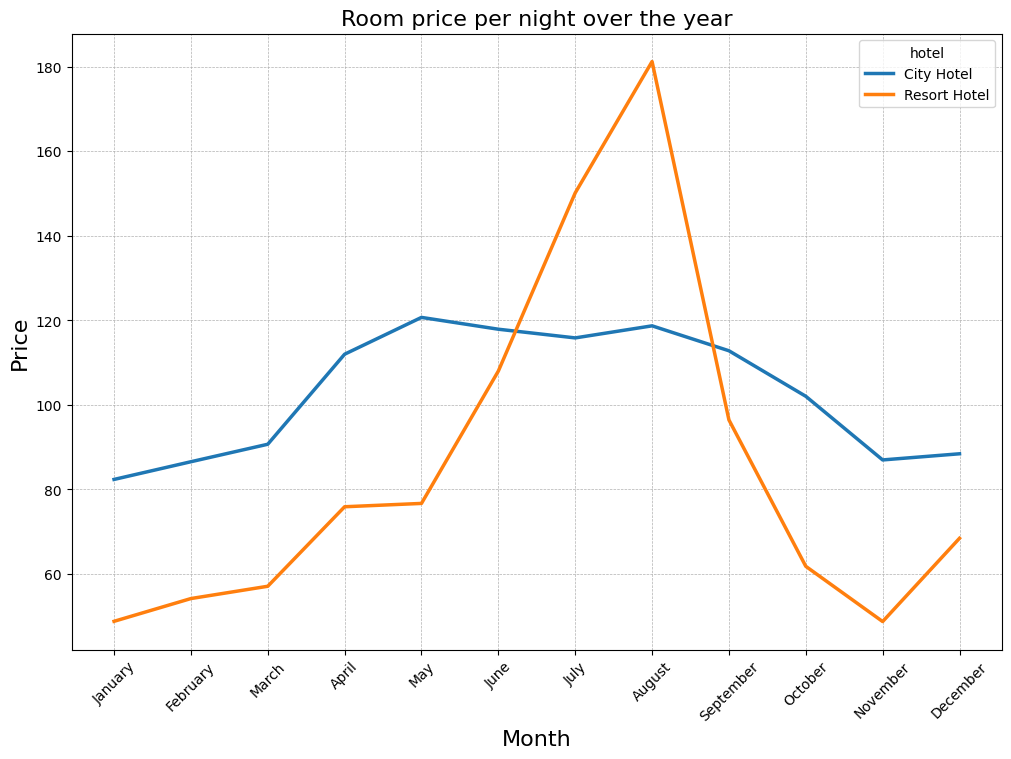

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=avg_price, 
            hue_order = ["City Hotel", "Resort Hotel"], errorbar="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price", fontsize=16)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()

Prices for resorts peak between July-September, potentially due to the holiday period.  
City prices also see an increease in prices during the warmer months but the peak is not as drastic as compared to resorts.

_______________________________________________________________________________________________________________________________________________________________________________________________________

## Cancellation rate causes

Let's begin by exploring numerical variables first

In [32]:
num = df.select_dtypes(include=['int64', 'float64'])
num_Correlation_Matrix = num.corr()

num_Correlation_Matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004862,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037886,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054698,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005559,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014541,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046134,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044651,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029416,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004862,-0.037886,0.054698,0.005559,0.014541,0.046134,0.044651,0.029416,1.000000,0.023999,-0.032477,-0.024755,-0.021079,0.050997,0.050456,-0.042555,-0.033294,0.325058,0.056245,0.081756
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


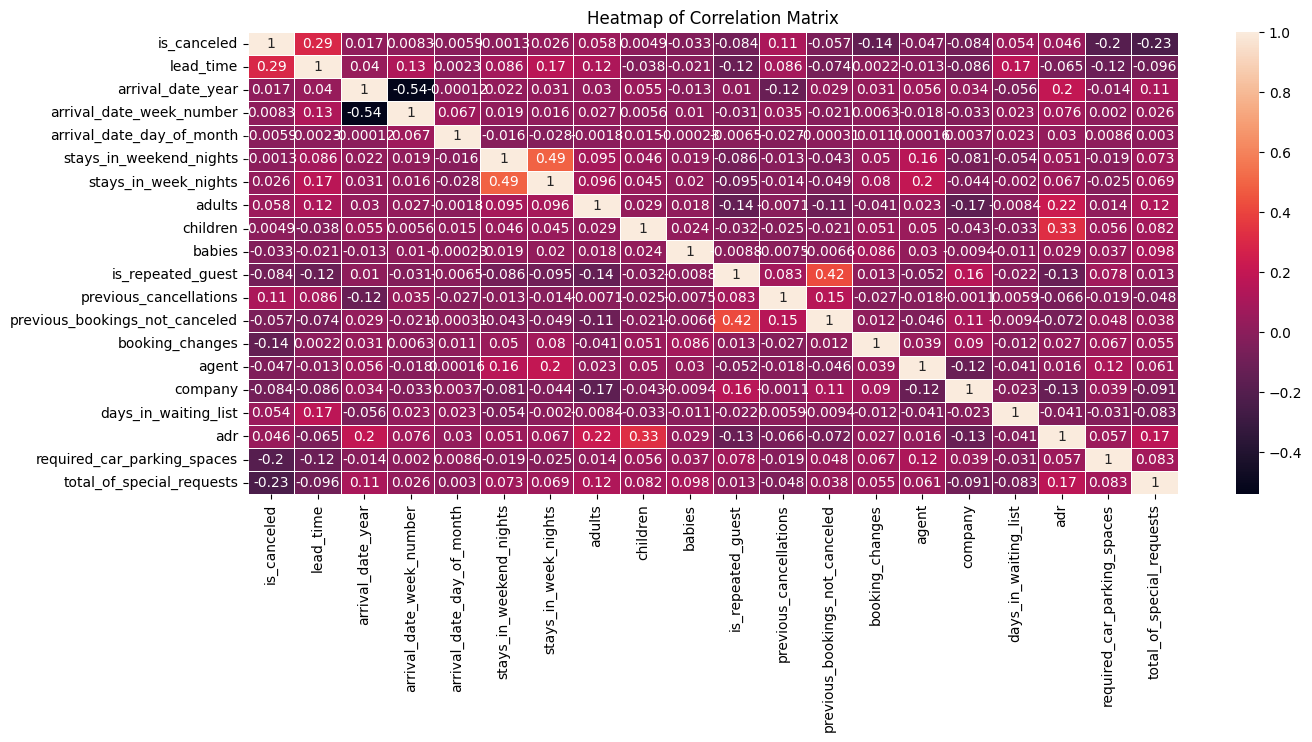

In [33]:
plt.figure(figsize=(15, 6))

sns.heatmap(num_Correlation_Matrix, annot=True, linewidths=0.6)

plt.title('Heatmap of Correlation Matrix')

plt.show()

In [34]:
num_is_canceled_corr = num_Correlation_Matrix[['is_canceled']]
num_is_canceled_corr_sorted = num_is_canceled_corr.sort_values(by='is_canceled', ascending=False) 
num_is_canceled_corr_sorted

,is_canceled
is_canceled,1.000000
lead_time,0.292876
previous_cancellations,0.110139
adults,0.058182
days_in_waiting_list,0.054301
adr,0.046492
stays_in_week_nights,0.025542
arrival_date_year,0.016622
arrival_date_week_number,0.008315
children,0.004862


Let's explore the relevant variables.  
We will only consider variables with an absolute correlation value of >0.1  

In [35]:
threshold = 0.1

relevant_num_is_canceled_corr = num_is_canceled_corr[abs(num_is_canceled_corr) > threshold]
relevant_num_is_canceled_corr_sorted = relevant_num_is_canceled_corr.sort_values(by='is_canceled', ascending=False)
relevant_num_is_canceled_corr_sorted = relevant_num_is_canceled_corr.dropna()

relevant_num_is_canceled_corr_sorted


,is_canceled
is_canceled,1.000000
lead_time,0.292876
previous_cancellations,0.110139
booking_changes,-0.144832
required_car_parking_spaces,-0.195701
total_of_special_requests,-0.234877


- `total_of_special_requests` appears to be negatively correlated with cancellations. While unfulfilled special requests might lead to cancellations, we lack information about the nature of these requests or whether they were fulfilled. Therefore, we can only hypothesize that unmet requests could contribute to cancellations. As a result, this variable will not be analyzed further.
    
- `required_car_parking_spaces` also seems to be negatively correlated with cancelations. However, as with special requets, we do not know if car parking spaces were made available or not because unmet parking requirements may cause cancellations. Therefore, this variable will not be further analyzed.
  
- `booking_changes` is also negatively correlated with cancelations. However, a customer making more changes in the bookings won't neccessarily lead to fewer cancellations as it is based on the booking requirement. Therefore, we drop this variable as well.

Let's examine the remaining variables one by one.
  
1. `lead_time`
2. `previous_cancellations`

### 1. Lead Time  
Let's examine the effect of `lead_time` on cancellations

In [36]:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,6264.0,0.066571,0.249297,0.0,0.0,0.0,0.0,1.0
1,3445.0,0.092308,0.289502,0.0,0.0,0.0,0.0,1.0
2,2065.0,0.103148,0.304225,0.0,0.0,0.0,0.0,1.0
3,1815.0,0.100275,0.300450,0.0,0.0,0.0,0.0,1.0
4,1710.0,0.102339,0.303182,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
629,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


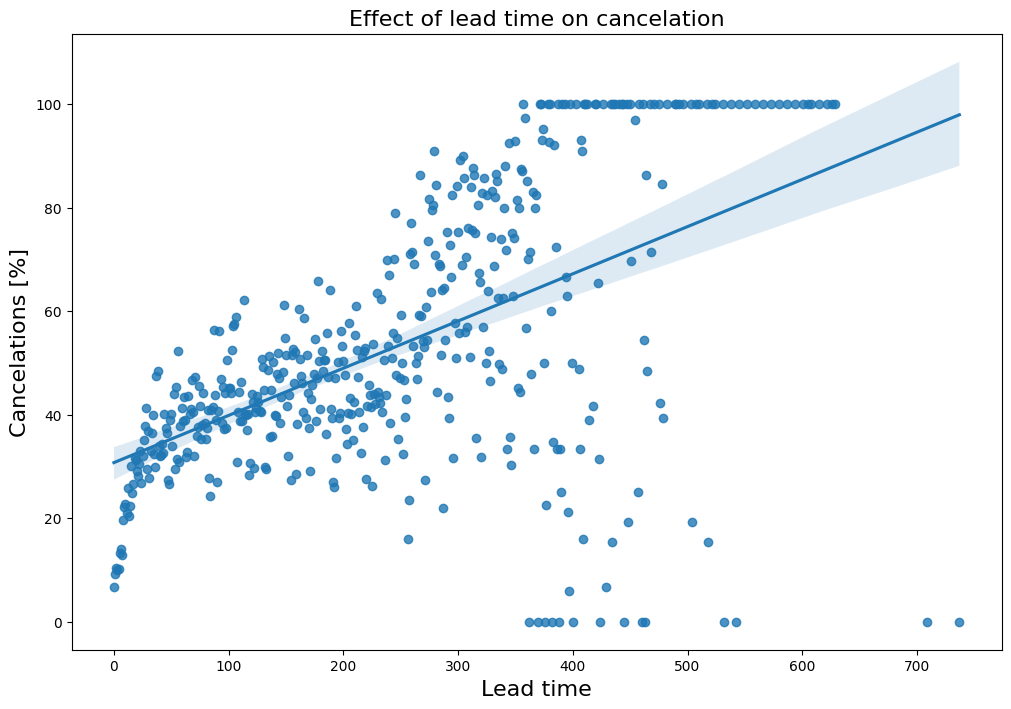

In [37]:
# group data for lead_time:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data.index, y=lead_cancel_data["mean"] * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

A longer lead time appears to correlate with higher cancellation rates, likely because customers make bookings during the early stages of trip planning, leaving a longer window for plans to change before confirmation.

In contrast, bookings with shorter lead times (closer to the arrival date) may indicate that the trip is already confirmed, and the customer is simply securing accommodation, which could explain the lower cancellation rates.

Let's see if these two variables have a linear relationship

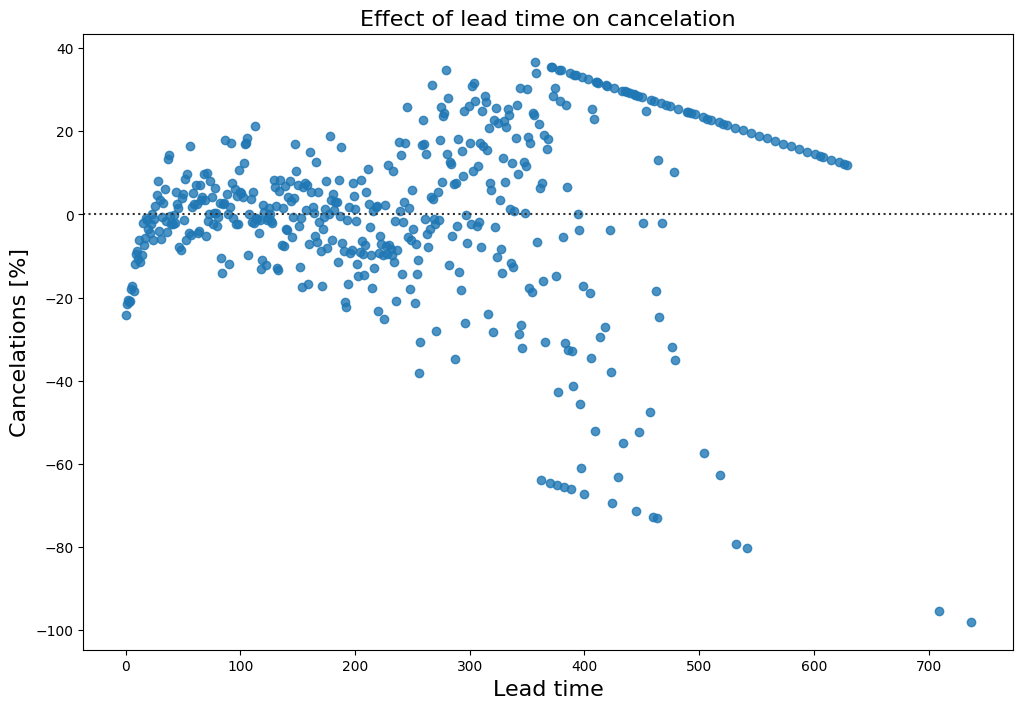

In [38]:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()

#show figure:
plt.figure(figsize=(12, 8))
sns.residplot(x=lead_cancel_data.index, y=lead_cancel_data["mean"]*100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

From the residual plot, we can observe that the points are not distributed randomly across the x-axis, we can say that `lead_time` and cancelations do not have a linear relationship. A non-linear model may be more appropriate to predict cancelations based on `lead_time`

### 2. Total number of previous cancellations

In [39]:
previous_cancel_data = df.groupby("previous_cancellations")["is_canceled"].mean()*100
previous_cancel_data = pd.DataFrame(previous_cancel_data).reset_index()
previous_cancel_data

,previous_cancellations,is_canceled
0,0,33.938313
1,1,94.444444
2,2,33.333333
3,3,30.769231
4,4,22.580645
5,5,10.526316
6,6,31.818182
7,11,28.571429
8,13,91.666667
9,14,100.000000


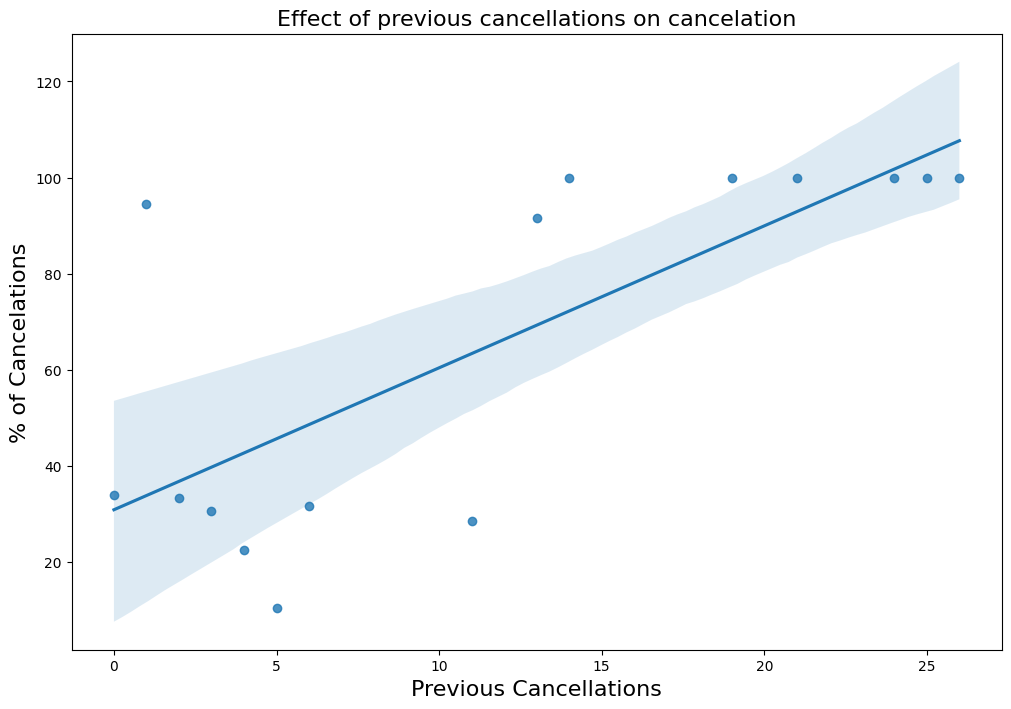

In [40]:
#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x='previous_cancellations', y="is_canceled", data = previous_cancel_data)
plt.title("Effect of previous cancellations on cancelation", fontsize=16)
plt.xlabel("Previous Cancellations", fontsize=16)
plt.ylabel("% of Cancelations", fontsize=16)
# plt.xlim(0,365)
plt.show()

It appears that the probability of cancellations increases if there is a previous record of cancellation.

C:\Users\nidhi\AppData\Local\Temp\ipykernel_1764\1051379882.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



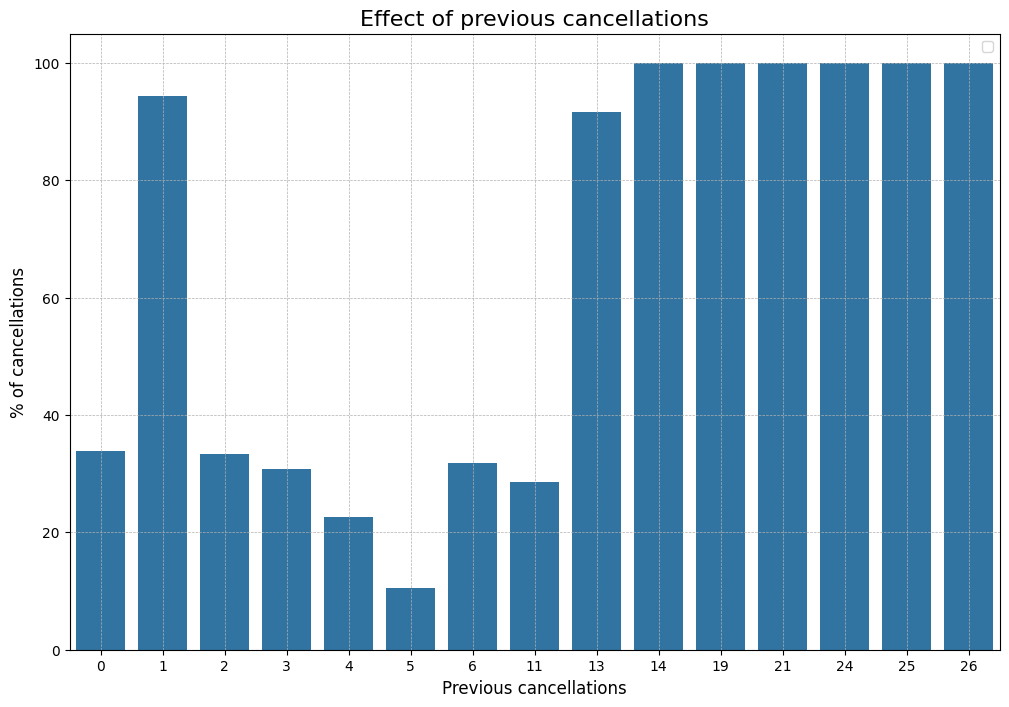

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'previous_cancellations', y = "is_canceled",data=previous_cancel_data,
            )
plt.title("Effect of previous cancellations", fontsize=16)
plt.xlabel("Previous cancellations", fontsize=12)
plt.ylabel('% of cancellations', fontsize=12)
plt.legend(loc="upper right")
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()

It is clear that guests who have 1 previous cancellation are the most likely ones to cancel again. Guests wtih more than 13 previous cancellations seem to be always likely to cancel in the future.

### Effect of price on cancellation  
Although `adr` does not show a strong correlation in our correlation matrix, it is still worth exploring to understand it's effect on cancellations

In [42]:
all_avg_price = df.groupby(by=['is_canceled','arrival_date_month'])['adr'].mean().reset_index()
all_avg_price['arrival_date_month'] = pd.Categorical(all_avg_price['arrival_date_month'], categories=month_order, ordered=True)
all_avg_price

,is_canceled,arrival_date_month,adr
0,0,April,97.931649
1,0,August,142.290603
2,0,December,79.232330
3,0,February,72.577923
4,0,January,67.108296
5,0,July,129.427889
6,0,June,114.721068
7,0,March,77.608690
8,0,May,104.962224
9,0,November,70.708235


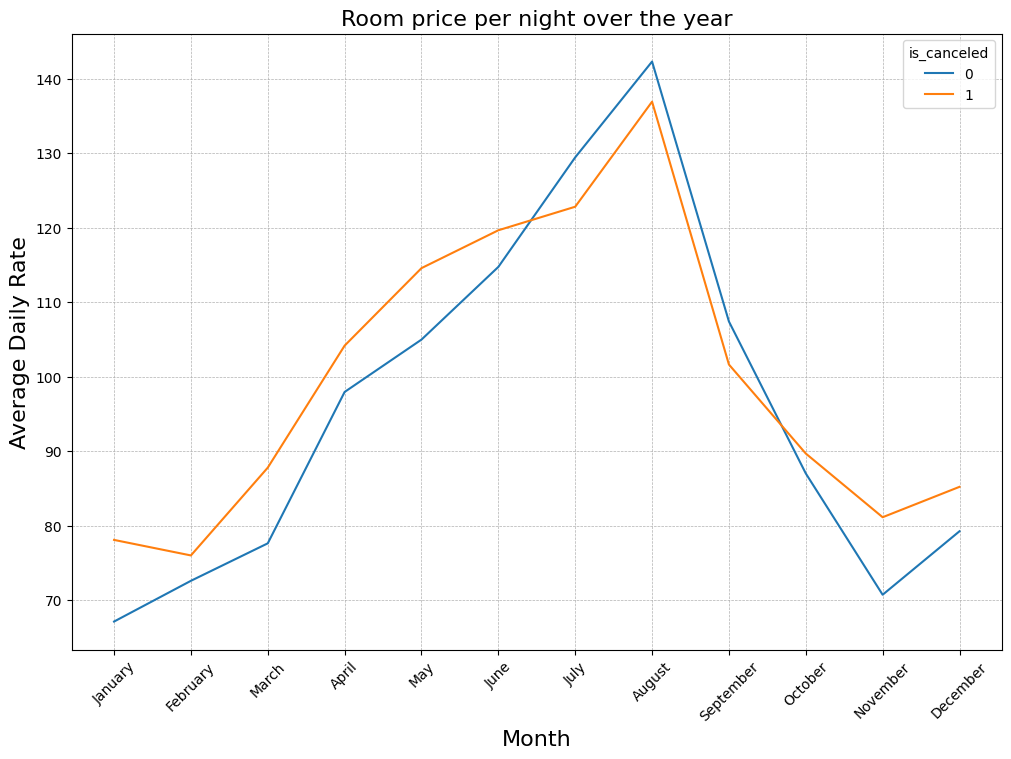

In [43]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="is_canceled", data=all_avg_price, 
             errorbar="sd")
plt.title("Room price per night over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate", fontsize=16)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()

Here, we can see that for most months (except the peak months of June-September), a higher price leads to more cancellations. 

# Conclusion (Numerical Variables) 
For numerical variables:  

- `lead_time` is worth investigating further as it may play a role in predicting cancellations.
- A history of 1 or more than 13 `previous_cancellations` also has a clear impact on the chance of cancellations.
- Although `adr` did not show a strong correlation with cancellation, it still indicates that higher prices lead to more cancellations. This also can be worth investigating.

_______________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Exploring Categorical Variables

We begin by encoding the categorical variables and then examining their correlation values against the target variable `is_canceled`

In [44]:

cat_cols = df.select_dtypes(include='object')
cat_cols

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

Correlation_Matrix = df.corr()
is_canceled_corr = Correlation_Matrix[['is_canceled']]  
is_canceled_corr_sorted = is_canceled_corr.sort_values(by='is_canceled', ascending=False)

# Define categorical columns
cat_cols = ['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date']
filtered_corr = is_canceled_corr_sorted.loc[cat_cols]

# Display only categorical columns
filtered_corr


,is_canceled
hotel,-0.137082
arrival_date_month,-0.001269
meal,-0.017227
country,0.265220
market_segment,0.059419
distribution_channel,0.167707
reserved_room_type,-0.062216
assigned_room_type,-0.175843
deposit_type,0.468676
customer_type,-0.068206


Let's consider variables with a correlation value of >0.1

In [46]:
threshold = 0.1

# Filter correlations that meet the threshold
relevant_corr = filtered_corr[abs(is_canceled_corr) > threshold]
relevant_corr_sorted = relevant_corr.sort_values(by = 'is_canceled',ascending=True)

relevant_corr_sorted=relevant_corr_sorted.dropna()

relevant_corr_sorted



,is_canceled
reservation_status,-0.917176
assigned_room_type,-0.175843
reservation_status_date,-0.162179
hotel,-0.137082
distribution_channel,0.167707
country,0.265220
deposit_type,0.468676


From these variables, let's drop a few:  
- `reservation_status` has values of 'Canceled', 'Check-Out' or 'No-Show'. These cannot be used to predict cancelations as Check-Out anc 'Canceled' almost have a 1-to-1 relationship.
- `reservation_status_date` will also not provide any information other than the date at which the reservation status was applied, so we drop this column too.


Let's decode all the categorical variables again so we can analyze them.

In [47]:
for col in label_encoders.keys():
    df[col] = label_encoders[col].inverse_transform(df[col])

### 1. Assigned Room Type

In [48]:
assigned_room_data = pd.DataFrame(df['assigned_room_type'].value_counts()).reset_index()
assigned_room_data = assigned_room_data.sort_values(by='count',ascending=False)

# Get the cancelled bookings by assigned room type
assigned_room_cancellations =  pd.DataFrame(df.loc[df['is_canceled'] == 1, 'assigned_room_type'].value_counts()).reset_index()
assigned_room_cancellations.columns = ['assigned_room_type', 'Cancelled'] 

# Get the confirmed bookings by assigned room type
assigned_rooms_confirmations =  pd.DataFrame(df.loc[df['is_canceled'] == 0, 'assigned_room_type'].value_counts()).reset_index()
assigned_rooms_confirmations.columns = ['assigned_room_type', 'Confirmed'] 

# Merge the confirmed and cancelled bookings by assigned room type
assigned_room_data = assigned_room_data.merge(assigned_rooms_confirmations, on='assigned_room_type', how='left').fillna(0)
assigned_room_data = assigned_room_data.merge(assigned_room_cancellations, on='assigned_room_type', how='left').fillna(0)

# Calculate % of Cancellations and % of Confirmations 
assigned_room_data['% of Cancellations'] = assigned_room_data['Cancelled']/assigned_room_data['count']*100
assigned_room_data['% of Confirmations'] = assigned_room_data['Confirmed']/assigned_room_data['count']*100

assigned_room_data


,assigned_room_type,count,Confirmed,Cancelled,% of Cancellations,% of Confirmations
0,A,74020,41077.0,32943,44.505539,55.494461
1,D,25309,18947.0,6362,25.137303,74.862697
2,E,7798,5836.0,1962,25.160298,74.839702
3,F,3751,2824.0,927,24.713410,75.286590
4,G,2549,1769.0,780,30.600235,69.399765
5,C,2370,1924.0,446,18.818565,81.181435
6,B,2154,1643.0,511,23.723305,76.276695
7,H,712,461.0,251,35.252809,64.747191
8,I,359,354.0,5,1.392758,98.607242
9,K,187,176.0,11,5.882353,94.117647


As we can see, 44% of room A were cancelled, however room A accounts for most of the bookings so its influence may be skewed by volume.  
Let's visualise it

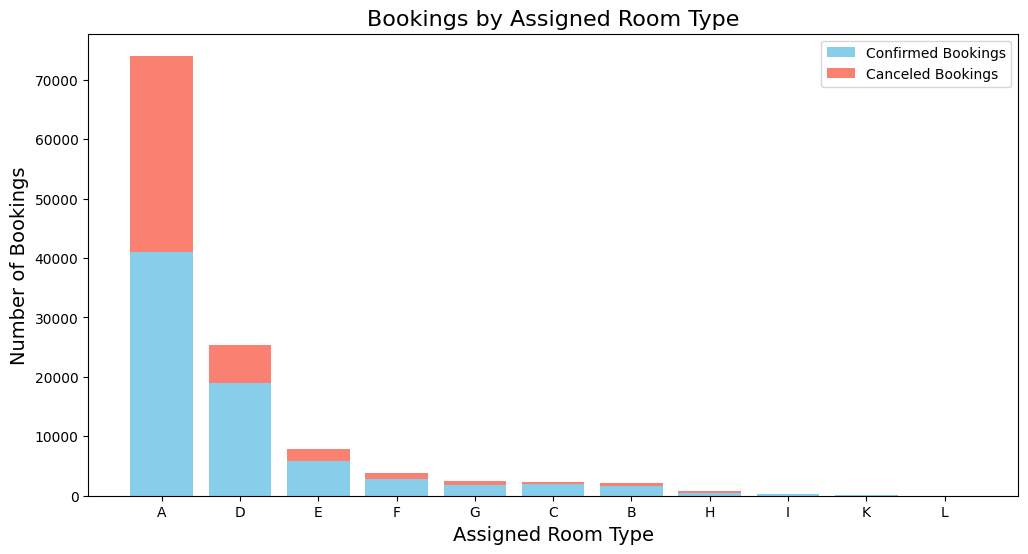

In [49]:
room_types = assigned_room_data["assigned_room_type"]
cancelled = assigned_room_data["Cancelled"]
confirmed = assigned_room_data["Confirmed"]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(room_types, confirmed, label="Confirmed Bookings", color="skyblue")
plt.bar(room_types, cancelled, label="Canceled Bookings", color="salmon", bottom=confirmed)
plt.title("Bookings by Assigned Room Type", fontsize=16)
plt.xlabel("Assigned Room Type", fontsize=14)
plt.ylabel("Number of Bookings", fontsize=14)
plt.legend()
plt.show()

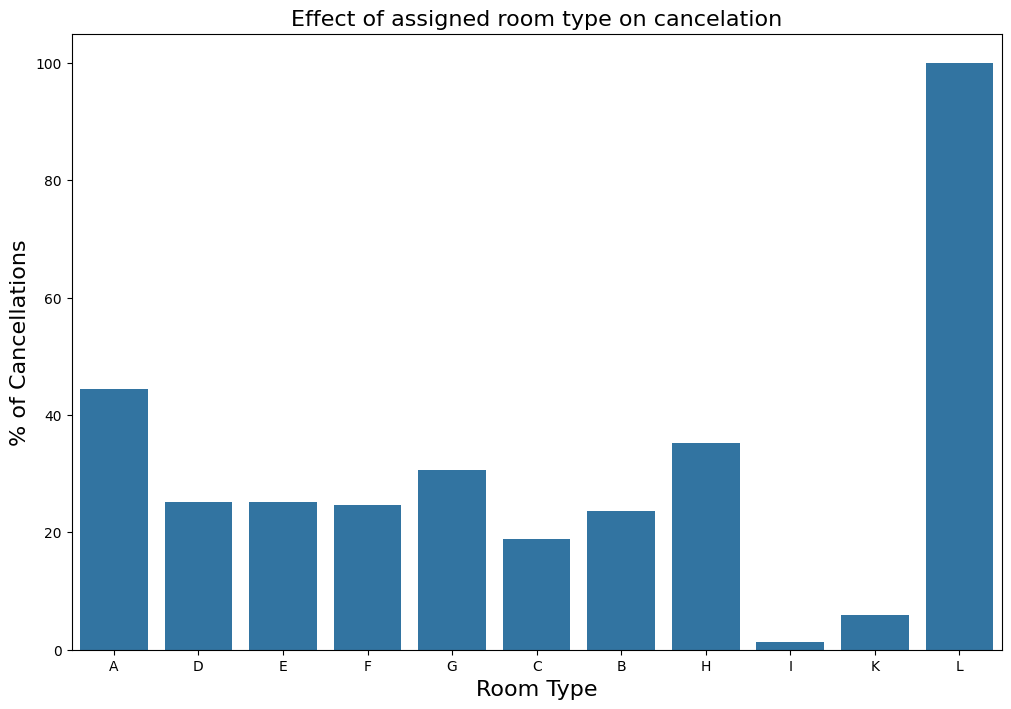

In [50]:

plt.figure(figsize=(12, 8))
sns.barplot(x='assigned_room_type', y='% of Cancellations',data = assigned_room_data)
plt.title("Effect of assigned room type on cancelation", fontsize=16)
plt.xlabel("Room Type", fontsize=16)
plt.ylabel("% of Cancellations", fontsize=16)
# plt.xlim(0,365)
plt.show()

Other than room type A which has majority of the bookings and room type L which has only one booking, most other rooms show similar percentages of cancellations

Let's see if other variables provide more insights into the cancellation rates of Room A.

In [51]:
assigned_room_lead_time = pd.DataFrame(df.groupby("assigned_room_type")["lead_time"].mean()).reset_index()
assigned_room_lead_time.columns = ['assigned_room_type','avg_lead_time']

assigned_room_adr = pd.DataFrame(df.groupby("assigned_room_type")["adr"].mean()).reset_index()
assigned_room_adr.columns = ['assigned_room_type','avg_adr']

assigned_room_previous_cancellations = pd.DataFrame(df.groupby("assigned_room_type")["previous_cancellations"].mean()*100).reset_index()
assigned_room_previous_cancellations.columns = ['assigned_room_type','% of Previous Cancellations']

assigned_room_data = assigned_room_data.merge(assigned_room_lead_time, on = 'assigned_room_type', how = 'left').fillna(0)
assigned_room_data = assigned_room_data.merge(assigned_room_adr, on = 'assigned_room_type', how = 'left').fillna(0)
assigned_room_data = assigned_room_data.merge(assigned_room_previous_cancellations, on = 'assigned_room_type', how = 'left').fillna(0)


assigned_room_data = assigned_room_data.sort_values(by ='Cancelled', ascending= False)
assigned_room_data

,assigned_room_type,count,Confirmed,Cancelled,% of Cancellations,% of Confirmations,avg_lead_time,avg_adr,% of Previous Cancellations
0,A,74020,41077.0,32943,44.505539,55.494461,118.945907,93.181262,12.974872
1,D,25309,18947.0,6362,25.137303,74.862697,77.946857,107.507720,1.564661
2,E,7798,5836.0,1962,25.160298,74.839702,86.625417,117.824977,2.205694
3,F,3751,2824.0,927,24.713410,75.286590,68.561983,151.889931,1.839509
4,G,2549,1769.0,780,30.600235,69.399765,76.070224,166.713174,2.196940
6,B,2154,1643.0,511,23.723305,76.276695,98.230734,94.844903,3.156917
5,C,2370,1924.0,446,18.818565,81.181435,88.583544,113.662873,0.801688
7,H,712,461.0,251,35.252809,64.747191,74.903090,171.380772,0.983146
9,K,187,176.0,11,5.882353,94.117647,43.572193,72.304920,0.534759
8,I,359,354.0,5,1.392758,98.607242,67.222841,41.298858,0.278552


Room A has the highest average `lead_time`, which could also be contributing to the cancellations.  
Since Room A is the most popular choice for bookings, increasing its availability could help shorten the lead time, potentially reducing the cancellation rates.  

Other variables such as a high `adr` may explain higher percentages of cancellations for Room G and Room H even though the booking volume is not as significant as other rooms.

### 2. Hotel

In [52]:
hotel_type_cancellations = pd.DataFrame(df['hotel'].value_counts())
hotel_type_cancellations = hotel_type_cancellations.sort_values(by='count',ascending=False)

cancelled_deposit_type = pd.DataFrame(df.loc[df['is_canceled'] == 1, 'hotel'].value_counts())
hotel_type_cancellations['Cancelled'] = cancelled_deposit_type['count']
hotel_type_cancellations["Confirmed"] = hotel_type_cancellations["count"] - hotel_type_cancellations["Cancelled"]
hotel_type_cancellations['% of Cancellations'] = hotel_type_cancellations['Cancelled']/hotel_type_cancellations['count']*100

hotel_type_cancellations

,count,Cancelled,Confirmed,% of Cancellations
hotel,,,,
City Hotel,79163,33079,46084,41.785935
Resort Hotel,40047,11120,28927,27.767373


Clearly, City hotels have more cancellations than resort hotels but also have twice the number of bookings.

Let's see if variables like `adr`, `lead_time` or `previous_cancellations` provides some additional insight

In [53]:
hotel_lead_times = pd.DataFrame(df.groupby("hotel")["lead_time"].mean()).reset_index()
hotel_lead_times.columns = ['hotel','avg_lead_time']

hotel_adr = pd.DataFrame(df.groupby("hotel")["adr"].mean()).reset_index()
hotel_adr.columns = ['hotel','avg_adr']

hotel_previous_cancellations = pd.DataFrame(df.groupby("hotel")["previous_cancellations"].mean()*100).reset_index()
hotel_previous_cancellations.columns = ['hotel','% of Previous Cancellations']

hotel_type_cancellations = hotel_type_cancellations.merge(hotel_lead_times, on = 'hotel', how = 'left').fillna(0)
hotel_type_cancellations = hotel_type_cancellations.merge(hotel_adr, on = 'hotel', how = 'left').fillna(0)
hotel_type_cancellations = hotel_type_cancellations.merge(hotel_previous_cancellations, on = 'hotel', how = 'left').fillna(0)


hotel_type_cancellations = hotel_type_cancellations.sort_values(by = 'Cancelled', ascending= False)
hotel_type_cancellations

,hotel,count,Cancelled,Confirmed,% of Cancellations,avg_lead_time,avg_adr,% of Previous Cancellations
0,City Hotel,79163,33079,46084,41.785935,109.884062,105.503191,7.982264
1,Resort Hotel,40047,11120,28927,27.767373,92.693810,94.983054,10.175544


Clearly, both `lead_time` and `adr` is higher for city hotels on average which may be contributing to higher rates of cancellations in cities. However, `previous_cancellations` seem to have no impact on cancellations.

### 3. Distribution Channel

In [54]:
distribution_channel_cancellations = pd.DataFrame(df['distribution_channel'].value_counts()).reset_index()
distribution_channel_cancellations = distribution_channel_cancellations.sort_values(by='count',ascending=False)

# Get the cancelled bookings by distribution channel
distribution_cancelled =  pd.DataFrame(df.loc[df['is_canceled'] == 1, 'distribution_channel'].value_counts()).reset_index()
distribution_cancelled.columns = ['distribution_channel', 'Cancelled'] 

# Get the confirmed bookings by distribution channel
distribution_confirmed =  pd.DataFrame(df.loc[df['is_canceled'] == 0, 'distribution_channel'].value_counts()).reset_index()
distribution_confirmed.columns = ['distribution_channel', 'Confirmed'] 

# Merge the confirmed and cancelled bookings
distribution_channel_cancellations = distribution_channel_cancellations.merge(distribution_confirmed, on='distribution_channel', how='left').fillna(0)
distribution_channel_cancellations = distribution_channel_cancellations.merge(distribution_cancelled, on='distribution_channel', how='left').fillna(0)

# Calculate % of Cancellations and % of Confirmations 
distribution_channel_cancellations['% of Cancellations'] = distribution_channel_cancellations['Cancelled']/distribution_channel_cancellations['count']*100
distribution_channel_cancellations['% of Confirmations'] = distribution_channel_cancellations['Confirmed']/distribution_channel_cancellations['count']*100

distribution_channel_cancellations


,distribution_channel,count,Confirmed,Cancelled,% of Cancellations,% of Confirmations
0,TA/TO,97750,57614,40136,41.059847,58.940153
1,Direct,14611,12056,2555,17.486825,82.513175
2,Corporate,6651,5184,1467,22.056834,77.943166
3,GDS,193,156,37,19.170984,80.829016
4,Undefined,5,1,4,80.000000,20.000000


Although 80% of cancellations come from "Undefined" distribution channel, there are only 5 bookings that have an undefined distribution channel.  
Therefore, most bookings get cancelled from TA/TO, however they also account for a majority of the bookings. 

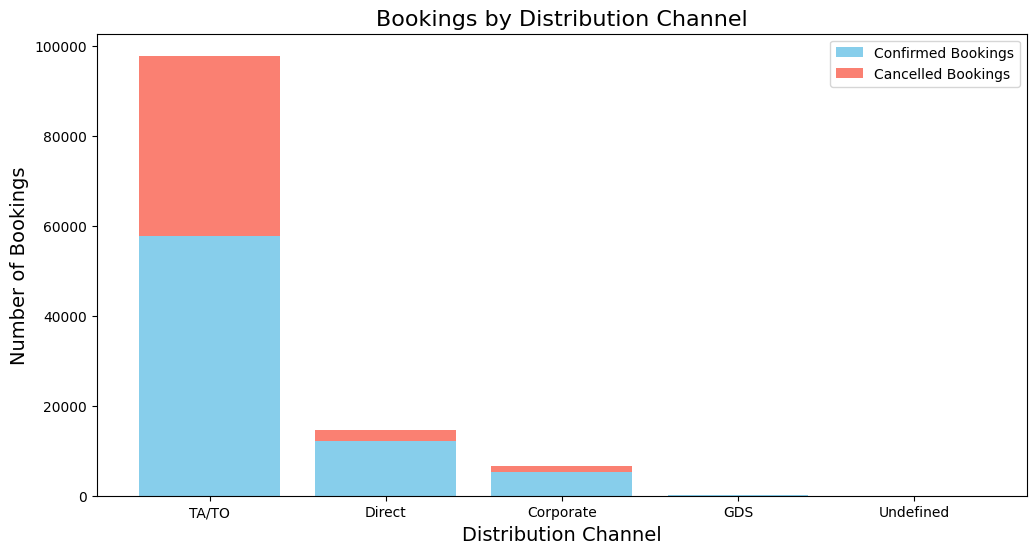

In [55]:
distribution_channels = distribution_channel_cancellations["distribution_channel"]
Cancelled = distribution_channel_cancellations["Cancelled"]
Confirmed = distribution_channel_cancellations["Confirmed"]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(distribution_channels, Confirmed, label="Confirmed Bookings", color="skyblue")
plt.bar(distribution_channels, Cancelled, label="Cancelled Bookings", color="salmon", bottom=Confirmed)
plt.title("Bookings by Distribution Channel", fontsize=16)
plt.xlabel("Distribution Channel", fontsize=14)
plt.ylabel("Number of Bookings", fontsize=14)
plt.legend()
plt.show()


It is worth looking into factors what could be leading to cancellations via TA/TO.

In [56]:
distribution_channel_lead_times = pd.DataFrame(df.groupby("distribution_channel")["lead_time"].mean()).reset_index()
distribution_channel_lead_times.columns = ['distribution_channel','avg_lead_time']

distribution_channel_adr = pd.DataFrame(df.groupby("distribution_channel")["adr"].mean()).reset_index()
distribution_channel_adr.columns = ['distribution_channel','avg_adr']

distribution_channel_previous_cancellations = pd.DataFrame(df.groupby("distribution_channel")["previous_cancellations"].mean()*100).reset_index()
distribution_channel_previous_cancellations.columns = ['distribution_channel','% of Previous Cancellations']

distribution_channel_cancellations = distribution_channel_cancellations.merge(distribution_channel_lead_times, on = 'distribution_channel', how = 'left').fillna(0)
distribution_channel_cancellations = distribution_channel_cancellations.merge(distribution_channel_adr, on = 'distribution_channel', how = 'left').fillna(0)
distribution_channel_cancellations = distribution_channel_cancellations.merge(distribution_channel_previous_cancellations, on = 'distribution_channel', how = 'left').fillna(0)


distribution_channel_cancellations = distribution_channel_cancellations.sort_values(by = 'Cancelled', ascending= False)
distribution_channel_cancellations

,distribution_channel,count,Confirmed,Cancelled,% of Cancellations,% of Confirmations,avg_lead_time,avg_adr,% of Previous Cancellations
0,TA/TO,97750,57614,40136,41.059847,58.940153,115.203427,103.404451,8.324297
1,Direct,14611,12056,2555,17.486825,82.513175,57.915132,106.876656,2.765040
2,Corporate,6651,5184,1467,22.056834,77.943166,45.018042,69.595157,27.860472
3,GDS,193,156,37,19.170984,80.829016,20.715026,120.554301,0.000000
4,Undefined,5,1,4,80.000000,20.000000,23.000000,46.240000,0.000000


Once again, `lead_time` is the highest for TA/TO channels which may have an impact on cancellation rates.  
Interestingly, there are a lot of `previous_cancellations` for Corporate distribution channels. Therefore, despite having a relatively low `adr`, there could be more cancellations. 

### 4. Desposit Type

In [57]:
deposit_type_cancellations = pd.DataFrame(df['deposit_type'].value_counts()).reset_index()
deposit_type_cancellations = deposit_type_cancellations.sort_values(by='count',ascending=False)

# Get the cancelled bookings by deposit type
deposit_cancelled =  pd.DataFrame(df.loc[df['is_canceled'] == 1, 'deposit_type'].value_counts()).reset_index()
deposit_cancelled.columns = ['deposit_type', 'Cancelled'] 

# Get the confirmed bookings by deposit type
deposit_confirmed =  pd.DataFrame(df.loc[df['is_canceled'] == 0, 'deposit_type'].value_counts()).reset_index()
deposit_confirmed.columns = ['deposit_type', 'Confirmed'] 

# Merge the confirmed and cancelled bookings
deposit_type_cancellations = deposit_type_cancellations.merge(deposit_confirmed, on='deposit_type', how='left').fillna(0)
deposit_type_cancellations = deposit_type_cancellations.merge(deposit_cancelled, on='deposit_type', how='left').fillna(0)

# Calculate % of Cancellations and % of Confirmations 
deposit_type_cancellations['% of Cancellations'] = deposit_type_cancellations['Cancelled']/deposit_type_cancellations['count']*100
deposit_type_cancellations['% of Confirmations'] = deposit_type_cancellations['Confirmed']/deposit_type_cancellations['count']*100

deposit_type_cancellations


,deposit_type,count,Confirmed,Cancelled,% of Cancellations,% of Confirmations
0,No Deposit,104461,74792,29669,28.401987,71.598013
1,Non Refund,14587,93,14494,99.362446,0.637554
2,Refundable,162,126,36,22.222222,77.777778


Counter-intuitively, Non-refundable deposit types have the most cancellations.  
It accounts for the second-most number of bookings and almost all of them are cancelled. 

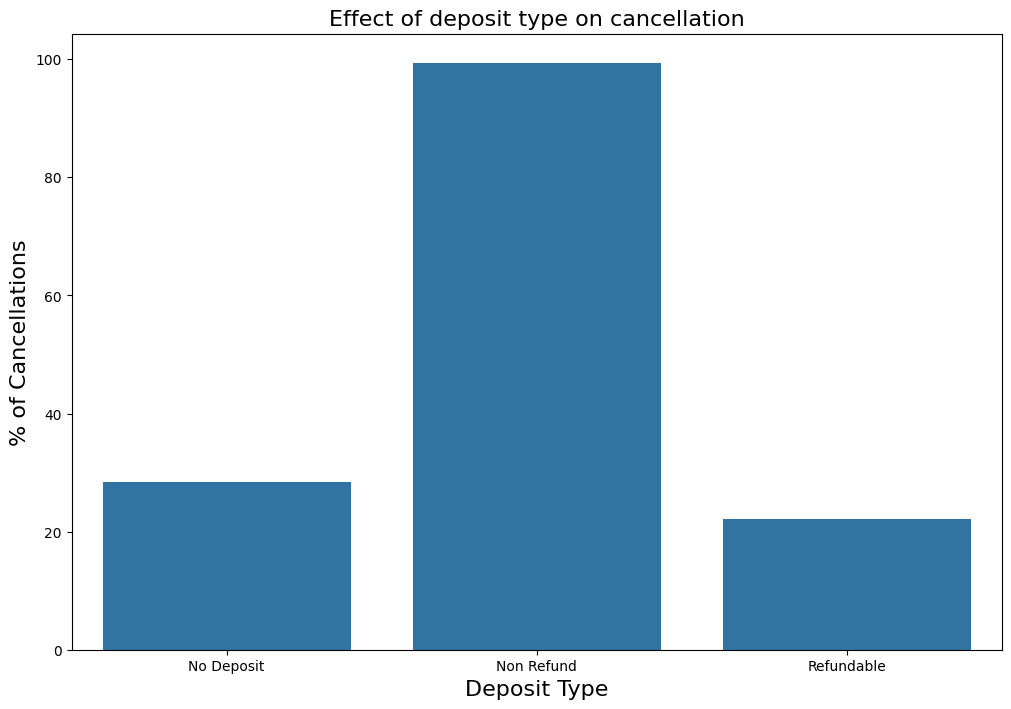

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(x='deposit_type', y='% of Cancellations',data = deposit_type_cancellations)
plt.title("Effect of deposit type on cancellation", fontsize=16)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("% of Cancellations", fontsize=16)
# plt.xlim(0,365)
plt.show()

Let's see if any other variables can explain why non-refundable deposit types have the most cancellations

In [59]:
deposit_lead_times = pd.DataFrame(df.groupby("deposit_type")["lead_time"].mean()).reset_index()
deposit_lead_times.columns = ['deposit_type','avg_lead_time']

deposit_adr = pd.DataFrame(df.groupby("deposit_type")["adr"].mean()).reset_index()
deposit_adr.columns = ['deposit_type','avg_adr']

deposit_type_previous_cancellations = pd.DataFrame(df.groupby("deposit_type")["previous_cancellations"].mean()*100).reset_index()
deposit_type_previous_cancellations.columns = ['deposit_type','% of Previous Cancellations']


deposit_type_cancellations = deposit_type_cancellations.merge(deposit_lead_times, on = 'deposit_type', how = 'left').fillna(0)
deposit_type_cancellations = deposit_type_cancellations.merge(deposit_adr, on = 'deposit_type', how = 'left').fillna(0)
deposit_type_cancellations = deposit_type_cancellations.merge(deposit_type_previous_cancellations, on = 'deposit_type', how = 'left').fillna(0)

deposit_type_cancellations = deposit_type_cancellations.sort_values(by = 'Cancelled', ascending= False)
deposit_type_cancellations

,deposit_type,count,Confirmed,Cancelled,% of Cancellations,% of Confirmations,avg_lead_time,avg_adr,% of Previous Cancellations
0,No Deposit,104461,74792,29669,28.401987,71.598013,88.841951,103.685436,4.204440
1,Non Refund,14587,93,14494,99.362446,0.637554,212.908891,89.964017,41.146226
2,Refundable,162,126,36,22.222222,77.777778,152.098765,76.209753,0.000000


Looks like the `lead_time` is the highest for non-refundable type bookings. This could explain why there are plenty of cancellations for Non-refundable deposits.   
Also, 41% of non-refundable deposits have a `previous_cancellation` record. This could be an additional factor contributing to more cancellation. 

### 5. Country

In [60]:

countries = pd.DataFrame(df['country'].value_counts()).reset_index()

# Get confirmed bookings by country
countries_confirmed = pd.DataFrame(df.loc[df['is_canceled'] == 0, 'country'].value_counts()).reset_index()
countries_confirmed.columns = ['country', 'Confirmed'] 

# Get cancelled bookings by country
countries_cancelled = pd.DataFrame(df.loc[df['is_canceled'] == 1, 'country'].value_counts()).reset_index()
countries_cancelled.columns = ['country', 'Cancelled']

# Merge confirmed and cancelled bookings by country
countries = countries.merge(countries_confirmed, on='country', how='left').fillna(0)
countries = countries.merge(countries_cancelled, on='country', how='left').fillna(0)

# Calculate cancellation rate and confirmation rate
countries['% of Cancellations'] = countries['Cancelled'] / countries['count'] * 100
countries['% of Confirmationss'] = countries['Confirmed'] / countries['count'] * 100

# Filter for countries with a cancellation rate above 15%
countries_above_15 = countries[countries['% of Cancellations'] > 15]

# Sort by count and cancellation rate
sorted_countries = countries_above_15.sort_values(by=['count', '% of Cancellations'], ascending=[False, False])

# Get the top 15 countries
most_cancelled_countries = sorted_countries.head(16)
most_cancelled_countries


,country,count,Confirmed,Cancelled,% of Cancellations,% of Confirmationss
0,PRT,48483,20977.0,27506.0,56.733288,43.266712
1,GBR,12120,9668.0,2452.0,20.231023,79.768977
2,FRA,10401,8468.0,1933.0,18.584751,81.415249
3,ESP,8560,6383.0,2177.0,25.432243,74.567757
4,DEU,7285,6067.0,1218.0,16.719286,83.280714
5,ITA,3761,2428.0,1333.0,35.442701,64.557299
6,IRL,3374,2542.0,832.0,24.659158,75.340842
7,BEL,2342,1868.0,474.0,20.239112,79.760888
8,BRA,2222,1392.0,830.0,37.353735,62.646265
9,NLD,2103,1716.0,387.0,18.402282,81.597718


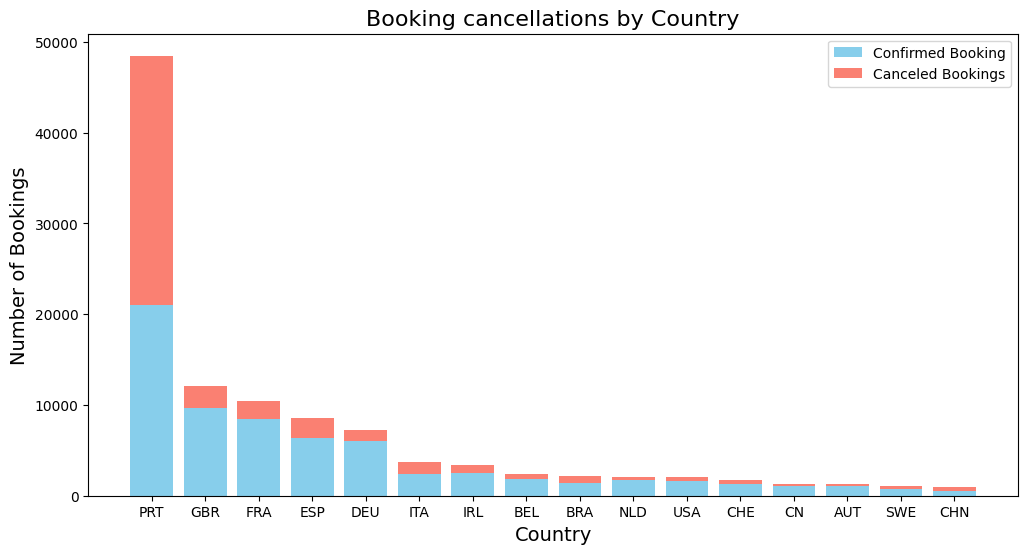

In [61]:

countries = most_cancelled_countries['country'] 
cancelled = most_cancelled_countries['Cancelled'] 
confirmed = most_cancelled_countries['Confirmed'] 

plt.figure(figsize=(12, 6))
plt.bar(countries, confirmed, label="Confirmed Booking", color="skyblue")
plt.bar(countries, cancelled, label="Canceled Bookings", color="salmon", bottom=confirmed)
plt.title("Booking cancellations by Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Number of Bookings", fontsize=14)
plt.legend()
plt.show()





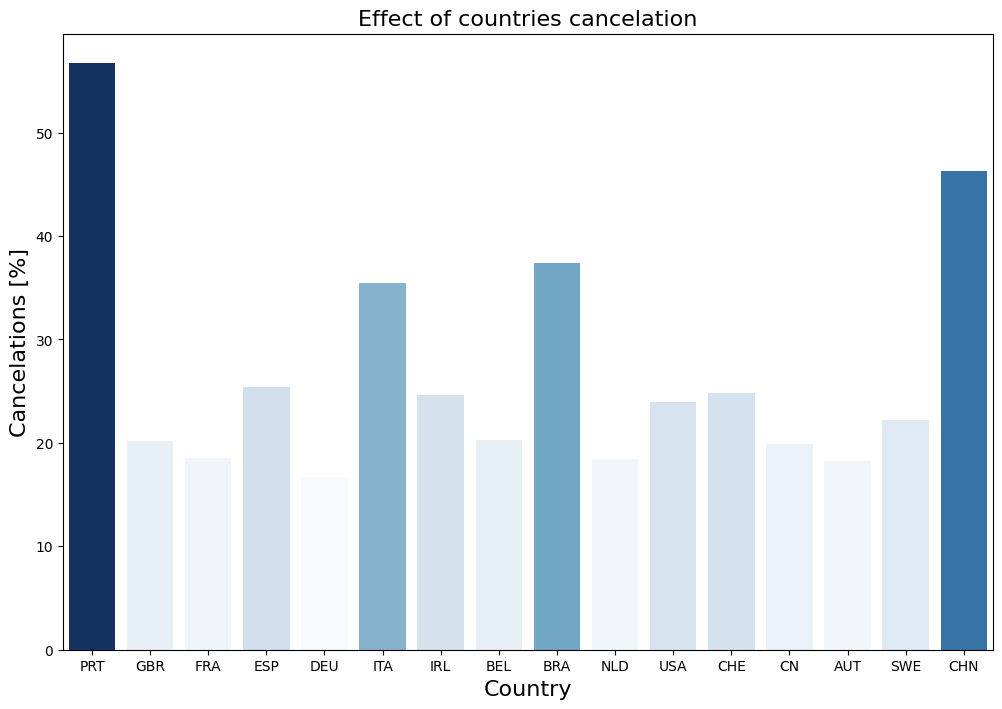

In [62]:
norm = plt.Normalize(most_cancelled_countries['% of Cancellations'].min(),
                     most_cancelled_countries['% of Cancellations'].max())

# Create a colormap
cmap = plt.cm.Blues  # Use a color map like Reds for intensity

# Map the normalized values to colors
colors = list(cmap(norm(most_cancelled_countries['% of Cancellations'])))

plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='% of Cancellations',data = most_cancelled_countries, palette = colors, hue = 'country')
plt.title("Effect of countries cancelation", fontsize=16)
plt.xlabel("Country", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

In our list of top 15 countries, Portugal has the most cancellations but also has the most number of bookings.  
Although Italy, Brazil and China does not have as many bookings as countries such as France and Spain, a considerable chunk of those bookings are still cancelled.

# Conclusion


### General Insights:

- City hotels receive more bookings than resort hotels.
- Both hotel types experience peak bookings and higher prices during the summer months.
- The majority of guests come from Portugal, with most international visitors originating from Europe.
- Online Travel Agents (TAs) account for the largest share of bookings, making them a crucial booking channel.

### Analysis of Cancellation Factors:

#### Numerical Variables:

- `Lead_time` has a significant impact on cancellation rates; longer lead times are strongly associated with higher cancellations.
- `Previous_cancellations` shows a moderate correlation with cancellations, indicating its potential as a predictor.

#### Categorical Variables:

- The `deposit_type`, particularly non-refundable deposits, is the most significant categorical factor influencing cancellations.
Other categorical variables also show some correlation but require further analysis in conjunction with other factors for deeper insights.

#### Other Variables:
Features such as the number of `required_car_parking_spaces` and `total_of_special requests` may also impact cancellations.
The quality of data for these variables needs improvement—more detailed information could enable robust and meaningful analysis.

# Reflection and Learnings

This analysis provided valuable insights into understanding patterns in hotel booking data and identifying factors that influence cancellation rates. Through this process, I gained a deeper understanding of:

- **Data Cleaning and Preprocessing**: Managing missing values, handling categorical and numerical variables, and ensuring data quality for meaningful analysis.
- **Exploratory Data Analysis (EDA)**: Using visualizations and statistical techniques to uncover trends, correlations, and insights in the data.
- **Feature Analysis**: Identifying key variables that have significant influence on the target outcomes.
- **Critical Thinking**: Evaluating data quality and recognizing areas where improvements could lead to more robust conclusions.

This project not only honed my technical skills in Python and data analysis but also deepened my ability to draw actionable insights from real-world datasets. It provided an opportunity to enhance my data analysis and visualization skills, crucial for effective decision-making as a product manager. By working with a real-world dataset, I gained experience in identifying meaningful patterns and deriving actionable insights. This project demonstrates my ability to analyze complex datasets, evaluate variable relationships, and translate data into strategic decisions—skills.